<a href="https://colab.research.google.com/github/isabelpbrasil/Limpeza-dos-dados-e-analise-exploratoria_ClientesBanco/blob/main/Pr%C3%A9_processamento_e_an%C3%A1lise_explorat%C3%B3ria_Clientes_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Coletando nossos dados

In [2]:
url = 'https://raw.githubusercontent.com/Mirlaa/restart_dg_2ed_aula/main/Dados/dados_restart.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,4777,40.0,trabalhador(a)-manual,casado(a),secundário,não,580.0,sim,não,,16,maio,192,1,0,NaN,não
1,10929,47.0,serviços,solteiro(a),secundário,não,3644.0,não,não,,9,junho,83,2,0,NaN,não
2,34411,28.0,gerente,solteiro(a),secundário,não,967.0,sim,não,celular,20,abril,174,1,1,falha,não
3,32887,53.0,administrativo,solteiro(a),secundário,não,2892.0,não,não,celular,9,abril,527,3,0,NaN,sim
4,16739,56.0,gerente,casado(a),terciário,não,217.0,não,sim,celular,21,julho,121,2,0,NaN,não


## Do que se tratam os dados

**Dicionário de dados:** Informação sobre nossos dados.

- `id`: Identificação única de cada registro;
- `idade`: Idade do cliente;
- `profissao`: Profissão do cliente;
- `estado_civil`: Estado civil do cliente;
- `educacao`: Nível de educação do cliente;
- `inadimplencia`: Indica se o cliente está inadimplente
- `saldo`: Saldo na conta do cliente;
- `habitacao`: Indica se o cliente possui habitação;
- `emprestimo`: Indica se o cliente possui empréstimo;
- `contato`: Tipo de contato com o cliente;
- `dia`: Dia do mês do último contato;
- `mes`: Mês do último contato;
- `duracao`: Duração da última ligação em segundos;
- `campanha`: Número de contatos realizados durante esta campanha;
- `contatos_anteriores`: Número de contatos realizados antes desta campanha;
- `resultado_campanha_anterior`: Resultado da campanha anterior; e
- `alvo`: Alvo da campanha.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45214 entries, 0 to 45213
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45214 non-null  int64  
 1   idade                        45205 non-null  float64
 2   profissao                    44926 non-null  object 
 3   estado_civil                 45214 non-null  object 
 4   educacao                     43357 non-null  object 
 5   inadimplencia                45214 non-null  object 
 6   saldo                        45211 non-null  float64
 7   habitacao                    45214 non-null  object 
 8   emprestimo                   45214 non-null  object 
 9   contato                      45214 non-null  object 
 10  dia                          45214 non-null  int64  
 11  mes                          45214 non-null  object 
 12  duracao                      45214 non-null  int64  
 13  campanha        

**Observações:**

- existem várias colunas com valores nulos
- todos os valores estão no tipo apropriado, caso não estivessem usaríamos o método [`astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [5]:
df.describe()

,id,idade,saldo,dia,duracao,campanha,contatos_anteriores
count,45214.000000,45205.000000,45211.000000,45214.000000,45214.000000,45214.000000,45214.000000
mean,23604.669969,40.954430,1362.276216,15.806233,258.160526,2.763746,0.580285
std,13052.031189,11.539046,3044.767017,8.322362,257.520154,3.097942,2.303369
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,12301.250000,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,23604.500000,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,34907.750000,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [6]:
df.describe(include="object")

,profissao,estado_civil,educacao,inadimplencia,habitacao,emprestimo,contato,mes,resultado_campanha_anterior,alvo
count,44926,45214,43357,45214,45214,45214,45214,45214,8252,45214
unique,11,3,3,2,2,2,3,12,3,2
top,trabalhador(a)-manual,casado(a),secundário,não,sim,não,celular,maio,falha,não
freq,9734,27216,23204,44399,25133,37970,29285,13769,4901,39925


**Observações:**

- Coluna `idade` com valores irreais
- Valores nulos em algumas colunas

In [7]:
df.nunique()

,0
id,45211
idade,79
profissao,11
estado_civil,3
educacao,3
inadimplencia,2
saldo,7168
habitacao,2
emprestimo,2
contato,3


**Observações:**

- Coluna `id` mostra que tem ids duplicados
- Temos colunas numéricas com apenas duas categorias, podem ser binários

## Lidando com duplicados e nulos

## Dados duplicados

Amostras duplicadas são dados que possuem **os mesmos valores** em colunas correspondentes.

Por exemplo, não há distinção da amostra A para amostra B, justamente porque todos os valores de colunas correspondentes são iguais. Por isso, transmitem **apenas uma informação.**

In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45209,False
45210,False
45211,False
45212,False


In [9]:
df.duplicated().sum()

np.int64(3)

In [10]:
df[df.duplicated()]

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
17636,5689,44.0,trabalhador(a)-manual,casado(a),secundário,não,1081.0,sim,não,,20,maio,304,2,0,NaN,não
22196,3360,24.0,técnico(a),solteiro(a),secundário,não,-192.0,sim,não,,13,maio,125,1,0,NaN,não
43547,1633,42.0,trabalhador(a)-manual,casado(a),primário,não,15.0,sim,não,,6,maio,230,1,0,NaN,não


O que fazer com essas amostras? Devemos removê-las do banco de dados.

Podemos citar três motivos principais para a remoção das amostras duplicadas:

- **Viés do modelo**: se há amostras duplicadas no conjunto de dados, pode ser que o modelo de machine learning dê mais importância para essas amostras repetidas.
- **Melhora do desempenho do modelo**: se inserimos amostras duplicadas, vão ser necessários mais cálculos e poder de processamento, além de ser um desperdício computacional trabalhar com amostras com o mesmo valor e que transmitem a mesma informação.
- **Aumento da qualidade dos resultados**: vamos inserir informações únicas, sem dados repetidos. Ou seja, vão ser mais relevantes para o modelo.

In [11]:
df.drop_duplicates(inplace=True)
df

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,4777,40.0,trabalhador(a)-manual,casado(a),secundário,não,580.0,sim,não,,16,maio,192,1,0,NaN,não
1,10929,47.0,serviços,solteiro(a),secundário,não,3644.0,não,não,,9,junho,83,2,0,NaN,não
2,34411,28.0,gerente,solteiro(a),secundário,não,967.0,sim,não,celular,20,abril,174,1,1,falha,não
3,32887,53.0,administrativo,solteiro(a),secundário,não,2892.0,não,não,celular,9,abril,527,3,0,NaN,sim
4,16739,56.0,gerente,casado(a),terciário,não,217.0,não,sim,celular,21,julho,121,2,0,NaN,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,12285,44.0,doméstico(a),solteiro(a),primário,não,1059.0,não,não,,18,junho,2093,1,0,NaN,sim
45210,45733,23.0,estudante,solteiro(a),terciário,não,508.0,não,não,celular,8,setembro,210,1,1,falha,não
45211,39159,34.0,técnico(a),divorciado(a),terciário,não,1317.0,sim,não,celular,15,maio,239,1,0,NaN,não
45212,1861,33.0,aposentado(a),casado(a),secundário,não,165.0,não,não,,7,maio,111,1,0,NaN,não


In [12]:
df.duplicated().sum()

np.int64(0)

## Dados nulos

Dados nulos são valores que estão ausentes ou são desconhecidos na base de dados.

In [13]:
df.isnull()

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [14]:
df.isnull().sum()

,0
id,0
idade,9
profissao,288
estado_civil,0
educacao,1857
inadimplencia,0
saldo,3
habitacao,0
emprestimo,0
contato,0


**Observações:**

- Apenas as colunas `idade` e `saldo` são colunas numéricas e ambas contém pouquíssimos dados nulos
- As colunas `profissao`, `educacao`, `resultado_campanha_anterior` contém dados nulos com diferentes valores.

### Dados numéricos

Não sabemos os valores originais em `idade` e `saldo`, mas não podemos substituir por qualquer valor.

- Viés nos dados: o modelo de machine learning vai tentar procurar padrões que vão estar incorretos, pois não são os dados reais. Isso pode levar a previsões enganosas, incorretas e que não são satisfatórias.
- Distorção de resultados: inserir um valor que não é o correto faz com que o modelo aprenda com dados incorretos e, consequentemente, levam a previsões que podem ser incorretas.

In [15]:
df.dropna(subset=['idade','saldo'])

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,4777,40.0,trabalhador(a)-manual,casado(a),secundário,não,580.0,sim,não,,16,maio,192,1,0,NaN,não
1,10929,47.0,serviços,solteiro(a),secundário,não,3644.0,não,não,,9,junho,83,2,0,NaN,não
2,34411,28.0,gerente,solteiro(a),secundário,não,967.0,sim,não,celular,20,abril,174,1,1,falha,não
3,32887,53.0,administrativo,solteiro(a),secundário,não,2892.0,não,não,celular,9,abril,527,3,0,NaN,sim
4,16739,56.0,gerente,casado(a),terciário,não,217.0,não,sim,celular,21,julho,121,2,0,NaN,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,12285,44.0,doméstico(a),solteiro(a),primário,não,1059.0,não,não,,18,junho,2093,1,0,NaN,sim
45210,45733,23.0,estudante,solteiro(a),terciário,não,508.0,não,não,celular,8,setembro,210,1,1,falha,não
45211,39159,34.0,técnico(a),divorciado(a),terciário,não,1317.0,sim,não,celular,15,maio,239,1,0,NaN,não
45212,1861,33.0,aposentado(a),casado(a),secundário,não,165.0,não,não,,7,maio,111,1,0,NaN,não


In [16]:
df.dropna(subset=['idade','saldo'], inplace=True)

In [17]:
df.isnull().sum()

,0
id,0
idade,0
profissao,288
estado_civil,0
educacao,1855
inadimplencia,0
saldo,0
habitacao,0
emprestimo,0
contato,0


### Dados textuais

In [18]:
for col in ['profissao','educacao','resultado_campanha_anterior']:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("\n")

Coluna: profissao
['trabalhador(a)-manual' 'serviços' 'gerente' 'administrativo'
 'desempregado(a)' 'aposentado(a)' 'técnico(a)' 'doméstico(a)'
 'empreendedor(a)' nan 'estudante' 'autônomo(a)']


Coluna: educacao
['secundário' 'terciário' nan 'primário']


Coluna: resultado_campanha_anterior
[nan 'falha' 'outro' 'sucesso']




In [19]:
df['profissao'].fillna('desconhecido', inplace = True)
df['educacao'].fillna('desconhecido', inplace = True)
df['resultado_campanha_anterior'].fillna('desconhecido', inplace = True)

In [20]:
df.isnull().sum()

,0
id,0
idade,0
profissao,0
estado_civil,0
educacao,0
inadimplencia,0
saldo,0
habitacao,0
emprestimo,0
contato,0


Vamos resetar os índices devido a esses índices saltados que devem ser evitados em machine learning.

In [21]:
df.reset_index(drop=True, inplace=True)

## Verificando outliers

Outliers, que são valores atípicos ou um ponto fora da curva. Em estatística, isso significa um dado que se distancia muito da distribuição padrão que os dados apresentam.

In [22]:
df_numericos = df.select_dtypes(include="number")
df_numericos.head()

,id,idade,saldo,dia,duracao,campanha,contatos_anteriores
0,4777,40.0,580.0,16,192,1,0
1,10929,47.0,3644.0,9,83,2,0
2,34411,28.0,967.0,20,174,1,1
3,32887,53.0,2892.0,9,527,3,0
4,16739,56.0,217.0,21,121,2,0


**Conhecendo o boxplot:**

![](https://github.com/Mirlaa/restart_dg_2ed_aula/blob/main/boxplot.png?raw=true)

No centro da caixa, encontramos a mediana, que divide os dados ao meio, com 50% à esquerda e 50% à direita.

Nos cantos superiores esquerdo e direito da caixa, estão os quartis Q1 e Q3, que dividem os dados em quatro partes iguais, cada uma com 25% dos dados. Até Q1, temos os 25% menores dados, enquanto Q3 abrange os 25% maiores.

Entre Q1 e Q3, encontramos os 75% dos dados, onde Q2 é a mediana. A partir de Q3, temos os 25% finais dos dados.

Acima da caixa, calculamos o IIQ (Intervalo Interquartil), que é a diferença entre Q3 e Q1.

À esquerda e à direita da caixa, existem duas arestas. Na aresta esquerda, calculamos o limite inferior como "Q1 - 1,5 x IIQ", e na aresta direita, o limite superior como "Q3 + 1,5 x IIQ". Valores abaixo do limite inferior ou acima do limite superior são considerados candidatos a outliers, que estamos buscando identificar.


```Python
import pandas as pd

# Calcular os quartis e a amplitude interquartil (IIQR) para a coluna específica
Q1 = df['nome_da_coluna'].quantile(0.25)
Q3 = df['nome_da_coluna'].quantile(0.75)
IIQR = Q3 - Q1

# Filtrar o DataFrame para remover outliers com base na coluna específica
df_sem_outliers = df[~((df['nome_da_coluna'] < (Q1 - 1.5 * IIQR)) | (df['nome_da_coluna'] > (Q3 + 1.5 * IIQR)))]
```

In [23]:
df_numericos.describe()

,id,idade,saldo,dia,duracao,campanha,contatos_anteriores
count,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000
mean,23611.490686,40.954292,1362.565686,15.809049,258.141637,2.764270,0.580465
std,13048.276539,11.539117,3045.076372,8.321781,257.438318,3.098276,2.303704
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,12311.750000,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,23611.500000,39.000000,449.000000,16.000000,180.000000,2.000000,0.000000
75%,34911.250000,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


<Axes: xlabel='idade'>

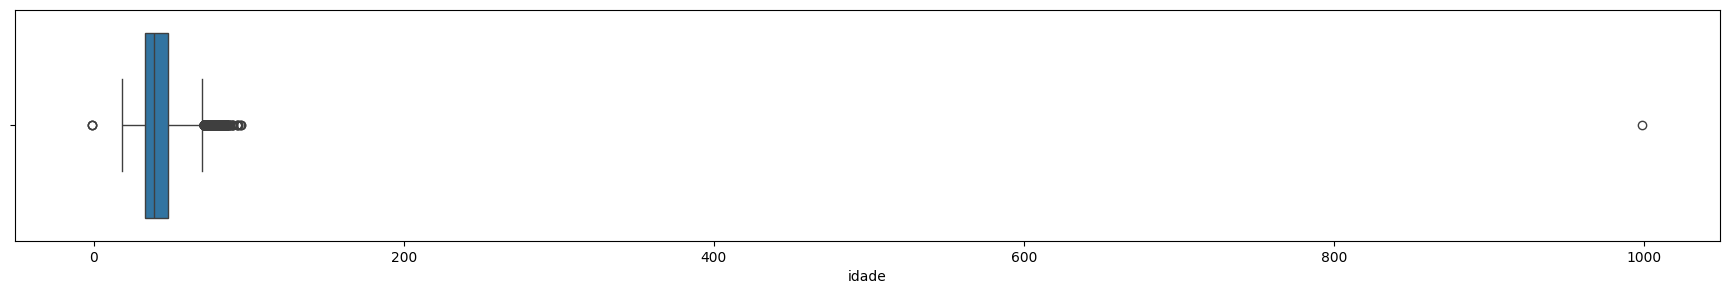

In [24]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['idade'])

In [25]:
df = df[df['idade']>= 18]
df = df[df['idade']< 120]

<Axes: xlabel='idade'>

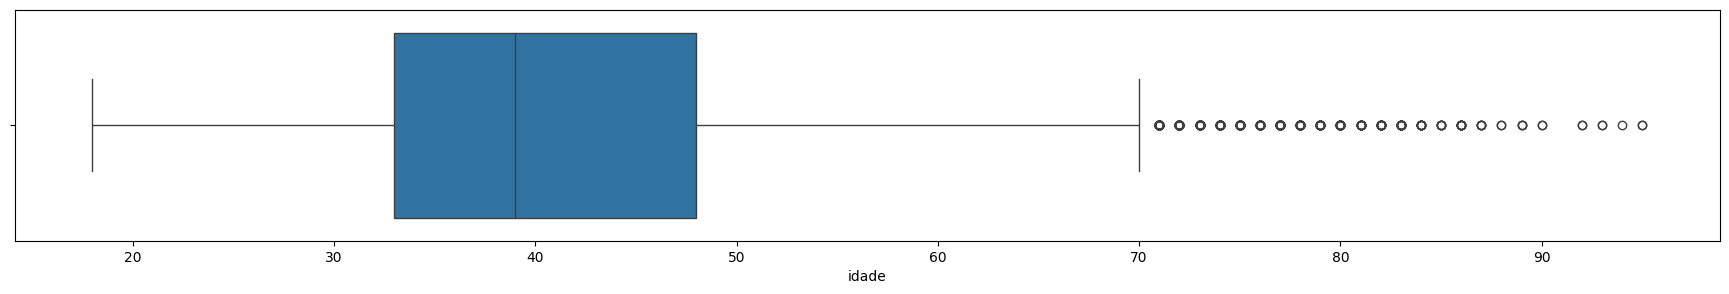

In [26]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['idade'])

<Axes: xlabel='contatos_anteriores'>

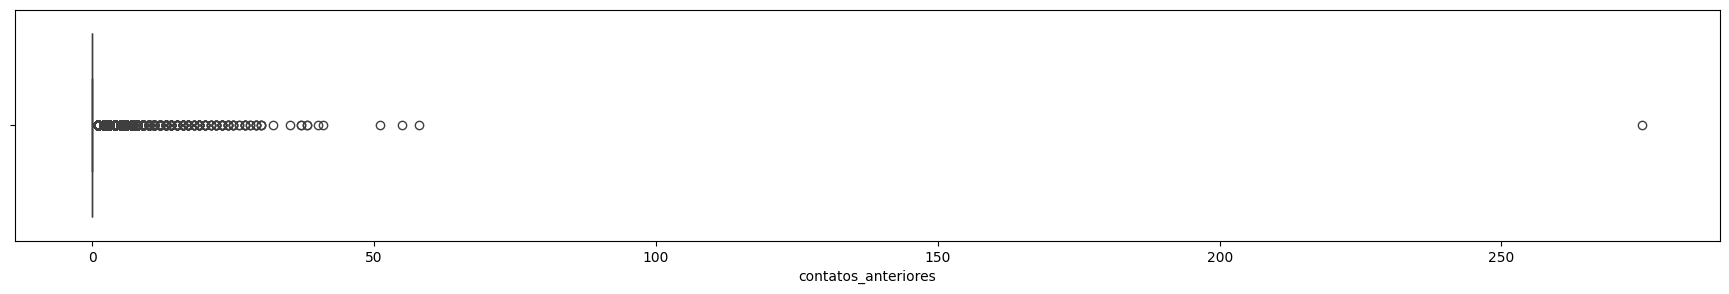

In [27]:
sns.boxplot(x=df['contatos_anteriores'])

In [28]:
df = df[df['contatos_anteriores']<=40]

<Axes: xlabel='contatos_anteriores'>

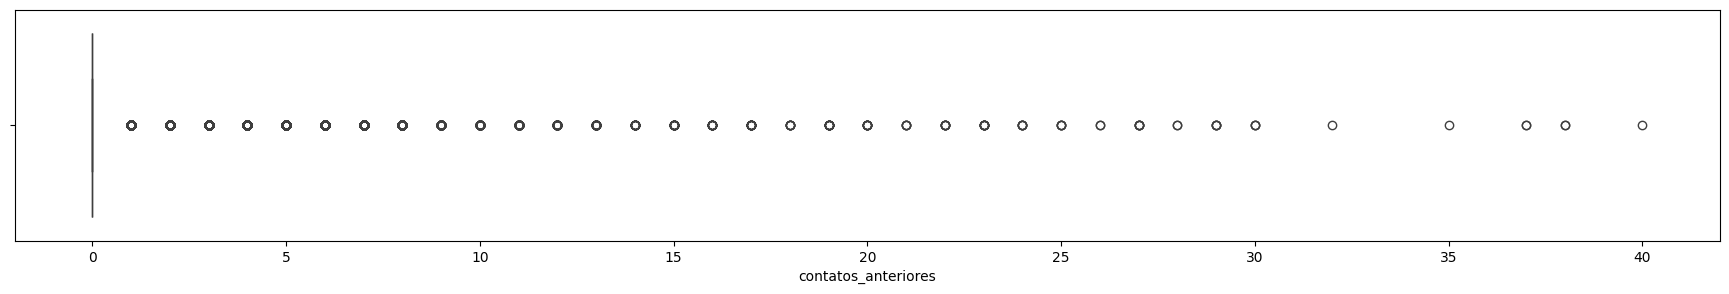

In [29]:
sns.boxplot(x=df['contatos_anteriores'])

In [30]:
df = df.reset_index(drop=True)

# Trabalhando com dados categóricos

## Ajuste de dados de texto

In [31]:
df

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,4777,40.0,trabalhador(a)-manual,casado(a),secundário,não,580.0,sim,não,,16,maio,192,1,0,desconhecido,não
1,10929,47.0,serviços,solteiro(a),secundário,não,3644.0,não,não,,9,junho,83,2,0,desconhecido,não
2,34411,28.0,gerente,solteiro(a),secundário,não,967.0,sim,não,celular,20,abril,174,1,1,falha,não
3,32887,53.0,administrativo,solteiro(a),secundário,não,2892.0,não,não,celular,9,abril,527,3,0,desconhecido,sim
4,16739,56.0,gerente,casado(a),terciário,não,217.0,não,sim,celular,21,julho,121,2,0,desconhecido,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,12285,44.0,doméstico(a),solteiro(a),primário,não,1059.0,não,não,,18,junho,2093,1,0,desconhecido,sim
45187,45733,23.0,estudante,solteiro(a),terciário,não,508.0,não,não,celular,8,setembro,210,1,1,falha,não
45188,39159,34.0,técnico(a),divorciado(a),terciário,não,1317.0,sim,não,celular,15,maio,239,1,0,desconhecido,não
45189,1861,33.0,aposentado(a),casado(a),secundário,não,165.0,não,não,,7,maio,111,1,0,desconhecido,não


In [32]:
df_textos = df.select_dtypes(exclude="number")
df_textos.head()

,profissao,estado_civil,educacao,inadimplencia,habitacao,emprestimo,contato,mes,resultado_campanha_anterior,alvo
0,trabalhador(a)-manual,casado(a),secundário,não,sim,não,,maio,desconhecido,não
1,serviços,solteiro(a),secundário,não,não,não,,junho,desconhecido,não
2,gerente,solteiro(a),secundário,não,sim,não,celular,abril,falha,não
3,administrativo,solteiro(a),secundário,não,não,não,celular,abril,desconhecido,sim
4,gerente,casado(a),terciário,não,não,sim,celular,julho,desconhecido,não


**Observações:**

- Quando vemos a coluna `contato` notamos que existem dados **vazios** nas primeiras linhas, vamos verificar que tipo de dado é esse.

In [33]:
for col in df_textos.columns:
    print(f"Coluna: {col}")
    print(df_textos[col].unique())
    print("\n")

Coluna: profissao
['trabalhador(a)-manual' 'serviços' 'gerente' 'administrativo'
 'desempregado(a)' 'aposentado(a)' 'técnico(a)' 'doméstico(a)'
 'empreendedor(a)' 'desconhecido' 'estudante' 'autônomo(a)']


Coluna: estado_civil
['casado(a)' 'solteiro(a)' 'divorciado(a)']


Coluna: educacao
['secundário' 'terciário' 'desconhecido' 'primário']


Coluna: inadimplencia
['não' 'sim']


Coluna: habitacao
['sim' 'não']


Coluna: emprestimo
['não' 'sim']


Coluna: contato
[' ' 'celular' 'telefone']


Coluna: mes
['maio' 'junho' 'abril' 'julho' 'fevereiro' 'março' 'outubro' 'novembro'
 'agosto' 'janeiro' 'setembro' 'dezembro']


Coluna: resultado_campanha_anterior
['desconhecido' 'falha' 'outro' 'sucesso']


Coluna: alvo
['não' 'sim']




In [34]:
df_textos.nunique()

,0
profissao,12
estado_civil,3
educacao,4
inadimplencia,2
habitacao,2
emprestimo,2
contato,3
mes,12
resultado_campanha_anterior,4
alvo,2


In [35]:
df['contato'] = df['contato'].replace(' ', 'outro')

In [36]:
df['contato'].unique()

array(['outro', 'celular', 'telefone'], dtype=object)

Variáveis categóricas são uma forma de agrupar informações em categorias diferentes, sem um valor numérico associado a elas, como o caso das variáveis numéricas.

Não conseguimos atribuir um valor numérico para essas variáveis, apenas classificá-las em categorias distintas.

O ***One-Hot Encoding*** é uma técnica de pré-processamento usada para lidar com colunas categóricas em um DataFrame, transformando essas categorias em representações binárias, onde cada categoria se torna uma nova coluna binária (0 ou 1).

Vamos ver um exemplo, temos um DataFrame que possui uma coluna de cores com valores categóricos:

|    | Cor      |
|---:|:---------|
|  0 | Vermelho |
|  1 | Azul     |
|  2 | Verde    |
|  3 | Vermelho |
|  4 | Amarelo  |

Ao aplicar o *One-Hot Encoding* convertemos cada cor (categoria) em uma coluna binária:

| | Cor_Amarelo | Cor_Azul | Cor_Verde | Cor_Vermelho |
|---:|-----:|---------:|-------:|-------:|
|  0 |  0 |          0 |0 |   1 |
|  1 |  0 |          1 |0 |   0 |
|  2 |  0 |          0 |1 |   0 |
|  3 |  0 |          0 |0 |   1 |
|  4 |  1 |          0 |0 |   0 |

Cada categoria única na coluna 'Cor' se torna uma nova coluna binária no DataFrame codificado. Por exemplo, 'Vermelho' se torna uma coluna chamada 'Cor_Vermelho', onde temos 1 para as linhas em que a cor é 'Vermelho' e 0 caso contrário. O mesmo princípio se aplica às outras cores.

- Existe a aplicação do *One-Hot Encoding* com Pandas utilizando [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

```Python
df = pd.get_dummies(df)

```

Mas podemos fazer diferente.

In [37]:
df.drop(['profissao'], axis=1, inplace=True)

In [38]:
categorias = {
    'estado_civil': ['casado(a)', 'solteiro(a)', 'divorciado(a)'],
    'educacao': ['secundário', 'terciário', 'desconhecido', 'primário'],
    'inadimplencia': ['sim'],
    'habitacao': ['sim'],
    'emprestimo': ['sim'],
    'contato': ['outro', 'celular', 'telefone'],
    'resultado_campanha_anterior': ['desconhecido', 'falha', 'outro', 'sucesso'],
}

In [39]:
from sklearn.preprocessing import OneHotEncoder
import joblib

codificador = OneHotEncoder(categories=[categorias[col] for col in categorias], sparse_output=False, handle_unknown='ignore')

colunas_codificadas = codificador.fit_transform(df[list(categorias.keys())])

In [40]:
colunas_codificadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Podemos salvar o encoder para aplicar em outro conjunto de dados, como o conjunto de teste.

In [41]:
joblib.dump(codificador, 'modelo_onehotencoder.pkl')

['modelo_onehotencoder.pkl']

Para carregar o modelo posteriormente

```Python
import pandas as pd
import joblib

encoder_loaded = joblib.load('modelo_onehotencoder.pkl')

# novos_dados é um outro conjunto de dados

colunas_categoricas = ['profissao', 'estado_civil', 'educacao', 'inadimplencia', 'habitacao',
                       'emprestimo', 'contato', 'mes', 'resultado_campanha_anterior']

dados_codificados_novos = codificador_carregado.transform(novos_dados[colunas_categoricas])
```

In [42]:
df_codificado = pd.DataFrame(colunas_codificadas, columns=codificador.get_feature_names_out())

In [43]:
df_codificado

,estado_civil_casado(a),estado_civil_solteiro(a),estado_civil_divorciado(a),educacao_secundário,educacao_terciário,educacao_desconhecido,educacao_primário,inadimplencia_sim,habitacao_sim,emprestimo_sim,contato_outro,contato_celular,contato_telefone,resultado_campanha_anterior_desconhecido,resultado_campanha_anterior_falha,resultado_campanha_anterior_outro,resultado_campanha_anterior_sucesso
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
45187,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45188,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
45189,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
df_final = pd.concat([df, df_codificado], axis=1)

df_final.drop(columns=list(categorias.keys()), inplace=True)

In [45]:
df_final

,id,idade,saldo,dia,mes,duracao,campanha,contatos_anteriores,alvo,estado_civil_casado(a),...,inadimplencia_sim,habitacao_sim,emprestimo_sim,contato_outro,contato_celular,contato_telefone,resultado_campanha_anterior_desconhecido,resultado_campanha_anterior_falha,resultado_campanha_anterior_outro,resultado_campanha_anterior_sucesso
0,4777,40.0,580.0,16,maio,192,1,0,não,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10929,47.0,3644.0,9,junho,83,2,0,não,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34411,28.0,967.0,20,abril,174,1,1,não,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,32887,53.0,2892.0,9,abril,527,3,0,sim,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16739,56.0,217.0,21,julho,121,2,0,não,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,12285,44.0,1059.0,18,junho,2093,1,0,sim,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
45187,45733,23.0,508.0,8,setembro,210,1,1,não,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45188,39159,34.0,1317.0,15,maio,239,1,0,não,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
45189,1861,33.0,165.0,7,maio,111,1,0,não,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dados da coluna alvo

**Observações:**

- Ainda existe uma coluna em formato de texto: `alvo`

In [46]:
binario_map = {
    'sim': 1,
    'não': 0
}

df_final['alvo'].map(binario_map)

,alvo
0,0
1,0
2,0
3,1
4,0
...,...
45186,1
45187,0
45188,0
45189,0


In [47]:
df_final['alvo'] = df_final['alvo'].map(binario_map)

In [48]:
mes_map = {
    'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4, 'maio': 5, 'junho': 6,
    'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}

df_final['mes'].map(mes_map)

,mes
0,5
1,6
2,4
3,4
4,7
...,...
45186,6
45187,9
45188,5
45189,5


In [49]:
df_final['mes'] = df_final['mes'].map(mes_map)

In [50]:
df_final

,id,idade,saldo,dia,mes,duracao,campanha,contatos_anteriores,alvo,estado_civil_casado(a),...,inadimplencia_sim,habitacao_sim,emprestimo_sim,contato_outro,contato_celular,contato_telefone,resultado_campanha_anterior_desconhecido,resultado_campanha_anterior_falha,resultado_campanha_anterior_outro,resultado_campanha_anterior_sucesso
0,4777,40.0,580.0,16,5,192,1,0,0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10929,47.0,3644.0,9,6,83,2,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34411,28.0,967.0,20,4,174,1,1,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,32887,53.0,2892.0,9,4,527,3,0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16739,56.0,217.0,21,7,121,2,0,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,12285,44.0,1059.0,18,6,2093,1,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
45187,45733,23.0,508.0,8,9,210,1,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45188,39159,34.0,1317.0,15,5,239,1,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
45189,1861,33.0,165.0,7,5,111,1,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
df_final.to_csv('dados_restart_tratados.csv', index=False)

# Visualizações

In [52]:
df_final.columns

Index(['id', 'idade', 'saldo', 'dia', 'mes', 'duracao', 'campanha',
       'contatos_anteriores', 'alvo', 'estado_civil_casado(a)',
       'estado_civil_solteiro(a)', 'estado_civil_divorciado(a)',
       'educacao_secundário', 'educacao_terciário', 'educacao_desconhecido',
       'educacao_primário', 'inadimplencia_sim', 'habitacao_sim',
       'emprestimo_sim', 'contato_outro', 'contato_celular',
       'contato_telefone', 'resultado_campanha_anterior_desconhecido',
       'resultado_campanha_anterior_falha',
       'resultado_campanha_anterior_outro',
       'resultado_campanha_anterior_sucesso'],
      dtype='object')

In [53]:
correlacoes = np.corrcoef(df_final.values, rowvar=False)
correlacoes

array([[ 1.00000000e+00,  1.51147457e-02,  7.35618543e-02,
        -6.20867913e-02,  2.03282939e-02,  1.31562825e-02,
        -1.03131133e-01,  3.33513515e-01,  2.95954829e-01,
        -7.10805452e-02,  9.39680232e-02, -2.35768454e-02,
        -4.68301781e-02,  1.08127051e-01, -6.86743673e-03,
        -6.83267290e-02, -5.29029859e-02, -1.75927451e-01,
        -8.44840075e-02, -7.50541852e-01,  6.46215213e-01,
         1.26999456e-01, -4.97127304e-01,  3.33658008e-01,
         2.07033878e-01,  2.63661871e-01],
       [ 1.51147457e-02,  1.00000000e+00,  9.77294333e-02,
        -9.05544906e-03,  9.29740241e-02, -4.74781201e-03,
         4.77821771e-03,  2.73317875e-03,  2.51712241e-02,
         2.86154305e-01, -4.27783352e-01,  1.64727353e-01,
        -9.39818569e-02, -8.15702776e-02,  6.96639183e-02,
         1.96116465e-01, -1.79145080e-02, -1.85607404e-01,
        -1.54189399e-02, -2.01699717e-02, -6.83903939e-02,
         1.70396577e-01, -7.63077813e-04, -5.05822890e-03,
        -2.28

- É possível também aplicar [`df.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) para ter a matriz de correlação.

Podemos buscar observar em um gráfico de calor os valores de correlação.

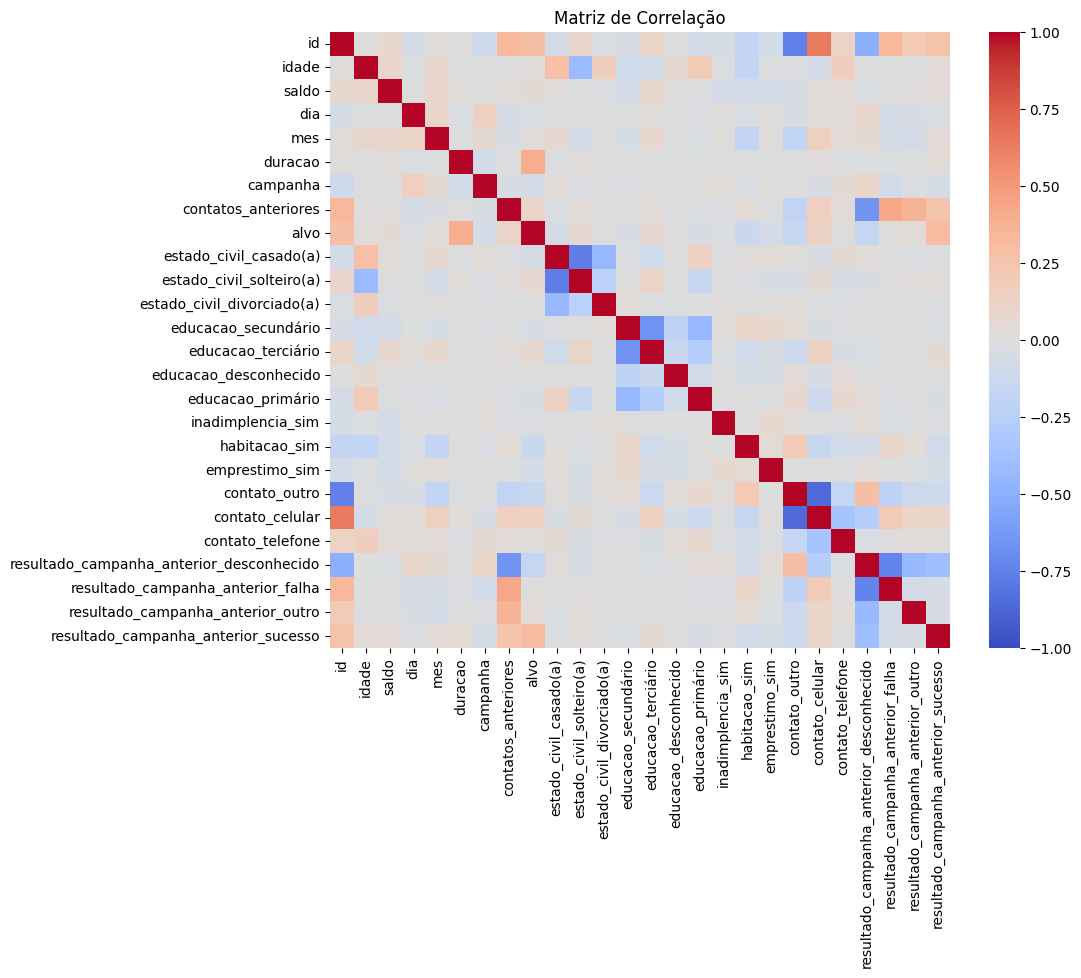

In [54]:
correlacoes_df = pd.DataFrame(correlacoes, index=df_final.columns, columns=df_final.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_df, cmap='coolwarm', vmin=-1, vmax=1, annot = False)
plt.title('Matriz de Correlação')
plt.show()

Temos muitas colunas para deixar na matriz.

In [55]:
correlacao_alvo = correlacoes_df['alvo'].sort_values(ascending=False)

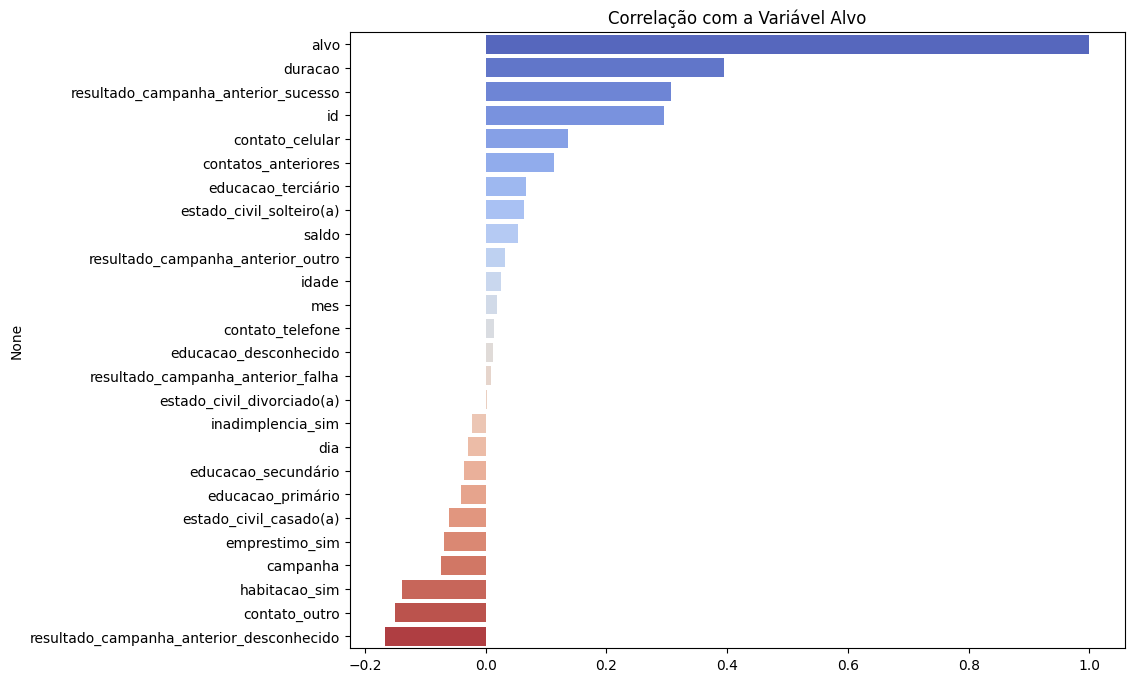

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x=correlacao_alvo.values, y=correlacao_alvo.index, palette='coolwarm')
plt.title('Correlação com a Variável Alvo')
plt.show()

# Documentação usada no projeto

Links da documentação para os métodos utilizados na oficina.

- [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv)
- [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info)
- [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)
- [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html#pandas.DataFrame.nunique)
- [`duplicated`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated)
- [`Funções built-in`](https://docs.python.org/3/library/functions.html)
- [`drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates)
- [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)
- [`unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html#pandas.Series.unique)
- [`isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull)
- [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- [`reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)
- [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes)
- [`plt.rcParams`](https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-dynamic-rc-settings)
- [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace)
- [`map`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map)
- [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)
- [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
- [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- [`corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)